# NYC High School Directory

## 1. Importing Libraries

In [42]:
# import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os

## 2. Read Data in pandas df

In [43]:
# load dataset
df = pd.read_csv(os.path.join('day_2_datasets', 'high-school-directory.csv'))
df.head()



,dbn,school_name,borough,building_code,phone_number,fax_number,grade_span_min,grade_span_max,expgrade_span_min,expgrade_span_max,...,Council District,Census Tract,BIN,BBL,NTA,Zip Codes,Community Districts,Borough Boundaries,City Council Districts,Police Precincts
0,27Q260,Frederick Douglass Academy VI High School,Queens,Q465,718-471-2154,718-471-2890,9.0,12,NaN,NaN,...,31.0,100802.0,4300730.0,4.157360e+09,Far Rockaway-Bayswater ...,20529.0,51,3,47,59
1,21K559,Life Academy High School for Film and Music,Brooklyn,K400,718-333-7750,718-333-7775,9.0,12,NaN,NaN,...,47.0,306.0,3186454.0,3.068830e+09,Gravesend ...,17616.0,21,2,45,35
2,16K393,Frederick Douglass Academy IV Secondary School,Brooklyn,K026,718-574-2820,718-574-2821,9.0,12,NaN,NaN,...,36.0,291.0,3393805.0,3.016160e+09,Stuyvesant Heights ...,18181.0,69,2,49,52
3,08X305,Pablo Neruda Academy,Bronx,X450,718-824-1682,718-824-1663,9.0,12,NaN,NaN,...,18.0,16.0,2022205.0,2.036040e+09,Soundview-Castle Hill-Clason Point-Harding Par...,11611.0,58,5,31,26
4,03M485,Fiorello H. LaGuardia High School of Music & A...,Manhattan,M485,212-496-0700,212-724-5748,9.0,12,NaN,NaN,...,6.0,151.0,1030341.0,1.011560e+09,Lincoln Square ...,12420.0,20,4,19,12


### Dataset Overview:

The DataFrame contains 435 NYC high schools with 69 columns including identification (dbn, school_name, borough), contact information (phone, address), and operational details (grade spans, student count).

**Data Completeness:**

Most core fields are complete (435 non-null entries), but some columns have missing values - notably fax_number (423), subway (358), and expansion grade spans (31-33), indicating varying data availability across schools.

**Feature Categories:**

The dataset encompasses location data, academic programs (AP courses, languages), extracurricular activities (sports, clubs), partnerships (corporate, cultural, nonprofit), accessibility services (ELL, special education), and administrative information (priorities, community districts).

In [44]:
print("Shape of DataFrame:", df.shape)
print("\n" + "*" * 50 , "\n")
print("Column Names:", df.columns.tolist())
print("\n" + "*" * 50 , "\n")
print("Info of DataFrame:")
df.info()




Shape of DataFrame: (435, 69)

************************************************** 

Column Names: ['dbn', 'school_name', 'borough', 'building_code', 'phone_number', 'fax_number', 'grade_span_min', 'grade_span_max', 'expgrade_span_min', 'expgrade_span_max', 'bus', 'subway', 'primary_address_line_1', 'city', 'state_code', 'postcode', 'website', 'total_students', 'campus_name', 'school_type', 'overview_paragraph', 'program_highlights', 'language_classes', 'advancedplacement_courses', 'online_ap_courses', 'online_language_courses', 'extracurricular_activities', 'psal_sports_boys', 'psal_sports_girls', 'psal_sports_coed', 'school_sports', 'partner_cbo', 'partner_hospital', 'partner_highered', 'partner_cultural', 'partner_nonprofit', 'partner_corporate', 'partner_financial', 'partner_other', 'addtl_info1', 'addtl_info2', 'start_time', 'end_time', 'se_services', 'ell_programs', 'school_accessibility_description', 'number_programs', 'priority01', 'priority02', 'priority03', 'priority04', 'prio

### 2.1 Cleaning and standardizing column names

In [45]:
# column name that have object type
object_columns = df.select_dtypes(include=['object']).columns.tolist()
print("Object type columns:", object_columns)

# column name that have numeric type
numeric_columns = df.select_dtypes(include=['number']).columns.tolist()
print("Numeric type columns:", numeric_columns)

Object type columns: ['dbn', 'school_name', 'borough', 'building_code', 'phone_number', 'fax_number', 'bus', 'subway', 'primary_address_line_1', 'city', 'state_code', 'website', 'campus_name', 'school_type', 'overview_paragraph', 'program_highlights', 'language_classes', 'advancedplacement_courses', 'online_ap_courses', 'online_language_courses', 'extracurricular_activities', 'psal_sports_boys', 'psal_sports_girls', 'psal_sports_coed', 'school_sports', 'partner_cbo', 'partner_hospital', 'partner_highered', 'partner_cultural', 'partner_nonprofit', 'partner_corporate', 'partner_financial', 'partner_other', 'addtl_info1', 'addtl_info2', 'start_time', 'end_time', 'se_services', 'ell_programs', 'school_accessibility_description', 'priority01', 'priority02', 'priority03', 'priority04', 'priority05', 'priority06', 'priority07', 'priority08', 'priority09', 'priority10', 'Location 1', 'NTA']
Numeric type columns: ['grade_span_min', 'grade_span_max', 'expgrade_span_min', 'expgrade_span_max', 'po

In [46]:
# Standardize column names: lowercase with underscores
df.columns = df.columns.str.lower().str.replace(' ', '_')

# Verify the changes
print("Standardized Column Names:")
print(df.columns.tolist())

Standardized Column Names:
['dbn', 'school_name', 'borough', 'building_code', 'phone_number', 'fax_number', 'grade_span_min', 'grade_span_max', 'expgrade_span_min', 'expgrade_span_max', 'bus', 'subway', 'primary_address_line_1', 'city', 'state_code', 'postcode', 'website', 'total_students', 'campus_name', 'school_type', 'overview_paragraph', 'program_highlights', 'language_classes', 'advancedplacement_courses', 'online_ap_courses', 'online_language_courses', 'extracurricular_activities', 'psal_sports_boys', 'psal_sports_girls', 'psal_sports_coed', 'school_sports', 'partner_cbo', 'partner_hospital', 'partner_highered', 'partner_cultural', 'partner_nonprofit', 'partner_corporate', 'partner_financial', 'partner_other', 'addtl_info1', 'addtl_info2', 'start_time', 'end_time', 'se_services', 'ell_programs', 'school_accessibility_description', 'number_programs', 'priority01', 'priority02', 'priority03', 'priority04', 'priority05', 'priority06', 'priority07', 'priority08', 'priority09', 'prior

In [47]:
for col in df.columns.tolist():
    # check if there is any space in column name or special characters like '-', etc.
    if ' ' in col or '-' in col:
        print(col)

In [48]:
# Renaming specific columns for clarity
df.rename(columns={'advancedplacement_courses': 'advanced_placement_courses', 'expgrade_span_min': 'expected_grade_min', 'expgrade_span_max': 'expected_grade_max'}, inplace=True)

# Verify the changes
print("Updated column names:")
print('advanced_placement_courses' in df.columns)
print('expected_grade_min' in df.columns)
print('expected_grade_max' in df.columns)

Updated column names:
True
True
True


### 2.2 Fixing dtypes of columns

For better analysis, performance, and readability some of dtypes are changed.
| Column Group                                                                   | Recommended Type | Reason                    |
| ------------------------------------------------------------------------------ | ---------------- | ------------------------- |
| `borough`, `city`, `state_code`, `school_type`, `nta`                          | `category`       | Repeated categorical info |
| `dbn`, `bin`, `bbl`, `postcode`, `zip_codes`                                   | `object`         | IDs or string codes       |
| `start_time`, `end_time`                                                       | `datetime.time`  | For time operations       |
| `grade_span_min`, `grade_span_max`, `expected_grade_min`, `expected_grade_max` | `int` | True numeric ranges       |
| `total_students`, `number_programs`, etc.                                      | `int`            | Quantitative analysis     |
| Long text columns                                                              | `object`         | Descriptive text          |


In [49]:
from datetime import time

# --- 1️⃣ Categorical columns ---
categorical_cols = [
    'borough', 'building_code', 'city', 'state_code', 
    'school_type', 'nta'
]
for col in categorical_cols:
    if col in df.columns:
        df[col] = df[col].astype('category')

# --- 2️⃣ ID or code columns (keep as strings) ---
id_cols = ['dbn', 'bin', 'bbl', 'postcode', 'zip_codes']
for col in id_cols:
    if col in df.columns:
        df[col] = df[col].astype(str).str.strip()

# --- 3️⃣ Time columns ---
time_cols = ['start_time', 'end_time']
for col in time_cols:
    if col in df.columns:
        df[col] = pd.to_datetime(df[col], format='%H:%M', errors='coerce').dt.time

# --- 4️⃣ Grade span numeric conversions (coerce non-numeric like 'K', 'PK') ---
grade_cols = ['grade_span_min', 'grade_span_max', 'expected_grade_min', 'expected_grade_max']
for col in grade_cols:
    if col in df.columns:
        df[col] = pd.to_numeric(df[col], errors='coerce')

# --- 5️⃣ True numeric columns ---
numeric_cols = [
    'total_students', 'number_programs', 'community_board', 
    'council_district', 'police_precincts'
]
for col in numeric_cols:
    if col in df.columns:
        df[col] = pd.to_numeric(df[col], errors='coerce').astype('Int64')

# --- 6️⃣ Optional cleanup: remove leading/trailing whitespace in all string columns ---
str_cols = df.select_dtypes(include='object').columns
df[str_cols] = df[str_cols].apply(lambda x: x.str.strip())

# --- ✅ Check results ---
print(df.dtypes)


dbn                         object
school_name                 object
borough                   category
building_code             category
phone_number                object
                            ...   
zip_codes                   object
community_districts          int64
borough_boundaries           int64
city_council_districts       int64
police_precincts             Int64
Length: 69, dtype: object


In [50]:
df.head()

,dbn,school_name,borough,building_code,phone_number,fax_number,grade_span_min,grade_span_max,expected_grade_min,expected_grade_max,...,council_district,census_tract,bin,bbl,nta,zip_codes,community_districts,borough_boundaries,city_council_districts,police_precincts
0,27Q260,Frederick Douglass Academy VI High School,Queens,Q465,718-471-2154,718-471-2890,9.0,12,NaN,NaN,...,31,100802.0,4300730.0,4157360001.0,Far Rockaway-Bayswater ...,20529.0,51,3,47,59
1,21K559,Life Academy High School for Film and Music,Brooklyn,K400,718-333-7750,718-333-7775,9.0,12,NaN,NaN,...,47,306.0,3186454.0,3068830001.0,Gravesend ...,17616.0,21,2,45,35
2,16K393,Frederick Douglass Academy IV Secondary School,Brooklyn,K026,718-574-2820,718-574-2821,9.0,12,NaN,NaN,...,36,291.0,3393805.0,3016160001.0,Stuyvesant Heights ...,18181.0,69,2,49,52
3,08X305,Pablo Neruda Academy,Bronx,X450,718-824-1682,718-824-1663,9.0,12,NaN,NaN,...,18,16.0,2022205.0,2036040039.0,Soundview-Castle Hill-Clason Point-Harding Par...,11611.0,58,5,31,26
4,03M485,Fiorello H. LaGuardia High School of Music & A...,Manhattan,M485,212-496-0700,212-724-5748,9.0,12,NaN,NaN,...,6,151.0,1030341.0,1011560030.0,Lincoln Square ...,12420.0,20,4,19,12


In [51]:
# print name of columns and number of null values in each column and percentage of null values in each column
null_counts = df.isnull().sum()
null_percentages = (null_counts / len(df)) * 100
null_summary = pd.DataFrame({'Null Count': null_counts, 'Null Percentage': null_percentages})
null_summary



,Null Count,Null Percentage
dbn,0,0.0
school_name,0,0.0
borough,0,0.0
building_code,0,0.0
phone_number,0,0.0
...,...,...
zip_codes,0,0.0
community_districts,0,0.0
borough_boundaries,0,0.0
city_council_districts,0,0.0


In [52]:
# print describe of non numeric column
df.describe(include = 'object')

,dbn,school_name,phone_number,fax_number,bus,subway,primary_address_line_1,postcode,website,campus_name,...,priority05,priority06,priority07,priority08,priority09,priority10,location_1,bin,bbl,zip_codes
count,435,435,435,423,434,358,435,435,430,217,...,39,17,4,1,1,1,435,435,435,435
unique,435,435,427,422,235,186,258,120,427,65,...,9,5,2,1,1,1,259,254,252,121
top,27Q260,Frederick Douglass Academy VI High School,718-381-7100,212-674-8021,"Bx22, Bx27, Bx36, Bx39, Bx5","1 to 18th St ; 2, 3, F, M to 14th St ; A, C, E...",800 East Gun Hill Road,10457,www.bard.edu/bhsec,Adlai E. Stevenson Educational Campus,...,Then to New York City residents,Then to New York City residents,Then to New York City residents,b) Then to Bronx students or residents who att...,c) Then to New York City residents who attend ...,"d) Then to Bronx students or residents, e) The...","{'latitude': '40.875754211', 'longitude': '-73...",1030343.0,2053680001.0,10935.0
freq,1,1,4,2,8,7,6,13,2,6,...,22,13,3,1,1,1,6,6,6,13


In [53]:
df.describe(include = 'number')

,grade_span_min,grade_span_max,expected_grade_min,expected_grade_max,total_students,number_programs,community_board,council_district,census_tract,community_districts,borough_boundaries,city_council_districts,police_precincts
count,432.000000,435.000000,31.000000,33.000000,426.0,435.0,432.0,432.0,432.000000,435.000000,435.000000,435.000000,435.0
mean,8.442130,11.894253,8.516129,12.363636,703.842723,1.708046,6.787037,21.856481,3988.340278,38.372414,3.452874,28.832184,36.949425
std,1.164591,0.421583,1.121635,0.783349,775.870436,1.564233,4.367781,14.321718,15582.415491,19.345374,1.212249,14.209488,21.10752
min,6.000000,9.000000,6.000000,12.000000,50.0,1.0,1.0,1.0,1.000000,1.000000,1.000000,1.000000,1.0
25%,9.000000,12.000000,9.000000,12.000000,349.0,1.0,3.0,10.0,118.000000,22.000000,2.000000,17.000000,23.0
50%,9.000000,12.000000,9.000000,12.000000,460.5,1.0,6.0,18.0,251.500000,39.000000,4.000000,32.000000,34.0
75%,9.000000,12.000000,9.000000,12.000000,622.0,2.0,10.0,34.0,510.250000,53.500000,5.000000,40.000000,54.0
max,9.000000,12.000000,9.000000,14.000000,5458.0,10.0,18.0,51.0,138501.000000,71.000000,5.000000,51.000000,77.0


## 3. Filter the dataset to include only schools located in Brooklyn
The df has been filterd for Brooklyn fo further analysis.


In [54]:
# Filter the dataset to include only schools located in Brooklyn
brooklyn_schools = df[df['borough'] == 'Brooklyn']
brooklyn_schools.head()


,dbn,school_name,borough,building_code,phone_number,fax_number,grade_span_min,grade_span_max,expected_grade_min,expected_grade_max,...,council_district,census_tract,bin,bbl,nta,zip_codes,community_districts,borough_boundaries,city_council_districts,police_precincts
1,21K559,Life Academy High School for Film and Music,Brooklyn,K400,718-333-7750,718-333-7775,9.0,12,NaN,NaN,...,47,306.0,3186454.0,3068830001.0,Gravesend ...,17616.0,21,2,45,35
2,16K393,Frederick Douglass Academy IV Secondary School,Brooklyn,K026,718-574-2820,718-574-2821,9.0,12,NaN,NaN,...,36,291.0,3393805.0,3016160001.0,Stuyvesant Heights ...,18181.0,69,2,49,52
7,17K122,Pathways in Technology Early College High Scho...,Brooklyn,K625,718-221-1593,718-221-1781,9.0,12,9.0,14.0,...,36,311.0,3030553.0,3012160046.0,Crown Heights North ...,17615.0,16,2,49,49
10,23K644,Eagle Academy for Young Men II,Brooklyn,K271,718-495-0863,718-732-2129,6.0,12,NaN,NaN,...,41,301.0,3042157.0,3015500001.0,Ocean Hill ...,13516.0,55,2,17,46
12,15K462,Secondary School for Law,Brooklyn,K460,718-832-4250,718-499-3947,9.0,12,NaN,NaN,...,39,155.0,3025510.0,3010820001.0,Park Slope-Gowanus ...,17617.0,14,2,27,50


In [55]:
brooklyn_schools.shape

(121, 69)

## 4. Total Unique schools in Brooklyn

In [56]:
# How many total schools are in Brooklyn? (use the method that counts only unique values. Also there is a column that has a unique identifier for schools.)
total_schools_brooklyn = brooklyn_schools['dbn'].nunique()
print("Total unique schools in Brooklyn:", total_schools_brooklyn)


Total unique schools in Brooklyn: 121



### Results — Brooklyn Grade 9 entry

- Total unique schools in Brooklyn: 121

- Schools offering Grade 9 entry: 121

Interpretation:
- Filtered set includes schools offering Grade 9 where `grade_span_min <= 9 <= grade_span_max` (captures schools that start earlier).  
- All schools in Brooklyn that are listed in the dataset include Grade 9 within their grade span.
- This suggests that every school in this subset either starts at or includes high school level grades (Grade 9 and above).


In [57]:
# How many schools in Brooklyn offer Grade 9 entry? (here you need to use range to get the correct answer for example just stating min_grade entry >=9 will miss the schools that offer earlier entry))
grade_9_entry_schools = brooklyn_schools[
    (brooklyn_schools['grade_span_min'] <= 9) & 
    (brooklyn_schools['grade_span_max'] >= 9)
]
total_grade_9_entry_schools = grade_9_entry_schools['dbn'].nunique()
print("Total unique schools in Brooklyn offering Grade 9 entry:", total_grade_9_entry_schools)


Total unique schools in Brooklyn offering Grade 9 entry: 121


In [58]:
print(brooklyn_schools['grade_span_min'].value_counts())
print(brooklyn_schools['grade_span_max'].value_counts())
print(grade_9_entry_schools.shape)

grade_span_min
9.0    98
6.0    23
Name: count, dtype: int64
grade_span_max
12    117
10      2
9       1
11      1
Name: count, dtype: int64
(121, 69)


In [59]:
brooklyn_schools[['grade_span_min','grade_span_max']]

,grade_span_min,grade_span_max
1,9.0,12
2,9.0,12
7,9.0,12
10,6.0,12
12,9.0,12
...,...,...
422,9.0,12
423,9.0,12
427,9.0,12
432,9.0,12


## 5. Unique School count in each borough
Following code groups the dataset by the borough column and counts the number of unique school identifiers (dbn) in each borough.This gives the total number of schools per borough, summarized in a new DataFrame called School_count_in_borough.

A bar plot is then created using Seaborn to visually compare how many schools each borough has.

Purpose:
This helps identify how educational institutions are distributed across NYC boroughs, showing which areas have the highest or lowest number of schools.

         borough  unique_num_schools
0          Bronx                 118
1       Brooklyn                 121
2      Manhattan                 106
3         Queens                  80
4  Staten Island                  10


/var/folders/gq/3d_53n2d05n2_n592s2dd_mr0000gn/T/ipykernel_14378/3387087426.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  Unique_School_count_in_borough = df.groupby('borough', as_index=False)['dbn'].nunique().rename(columns={'dbn': 'unique_num_schools'})


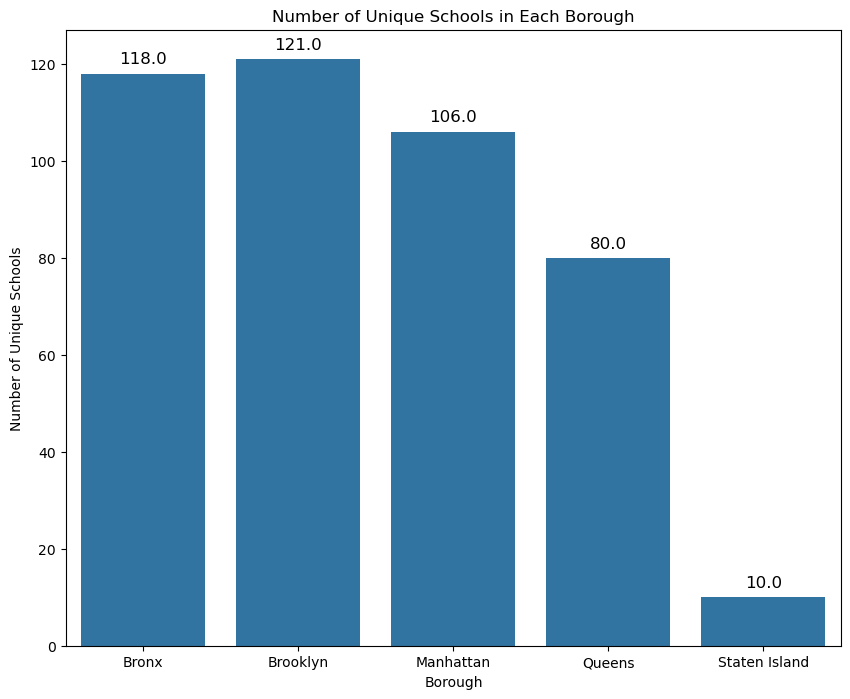

In [63]:
Unique_School_count_in_borough = df.groupby('borough', as_index=False)['dbn'].nunique().rename(columns={'dbn': 'unique_num_schools'})
print(Unique_School_count_in_borough)

# bar plot of number of schools in each borough
plt.figure(figsize=(10,8))
sns.barplot(data=Unique_School_count_in_borough, x='borough', y='unique_num_schools')
plt.title('Number of Unique Schools in Each Borough')
plt.xlabel('Borough')
plt.ylabel('Number of Unique Schools')
# Add data labels on top of the bars
ax = plt.gca()
for p in ax.patches:
    ax.annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='bottom', fontsize=12, color='black', xytext=(0, 5),
                textcoords='offset points')
plt.show()

### Total and average students by borough
- Brooklyn has the largest total student population (~83K), indicating the highest number of schools, though average size per school is moderate.

- Queens schools are larger on average (~1,047 students) but the total is slightly - below Brooklyn — fewer schools, but bigger ones.

- Manhattan and Bronx schools are smaller, with averages below 600 students — possibly reflecting more specialized or smaller community schools.

- Staten Island shows the highest average size (1,848) but the lowest total, meaning very few but very large schools.

In [ ]:
df.groupby('borough')['total_students'].agg([ 'mean', 'sum']).sort_values('sum', ascending=False)


/var/folders/gq/3d_53n2d05n2_n592s2dd_mr0000gn/T/ipykernel_5793/4200544458.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df.groupby('borough')['total_students'].agg([ 'mean', 'sum']).sort_values('sum', ascending=False)


,mean,sum
borough,,
Brooklyn,699.134454,83197
Queens,1046.644737,79545
Manhattan,589.825243,60752
Bronx,490.40678,57868
Staten Island,1847.5,18475


/var/folders/gq/3d_53n2d05n2_n592s2dd_mr0000gn/T/ipykernel_5793/1513522197.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  total_students_borough = df.groupby('borough', as_index=False)['total_students'].sum()
/var/folders/gq/3d_53n2d05n2_n592s2dd_mr0000gn/T/ipykernel_5793/1513522197.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=total_students_borough, x='borough', y='total_students', palette='viridis')


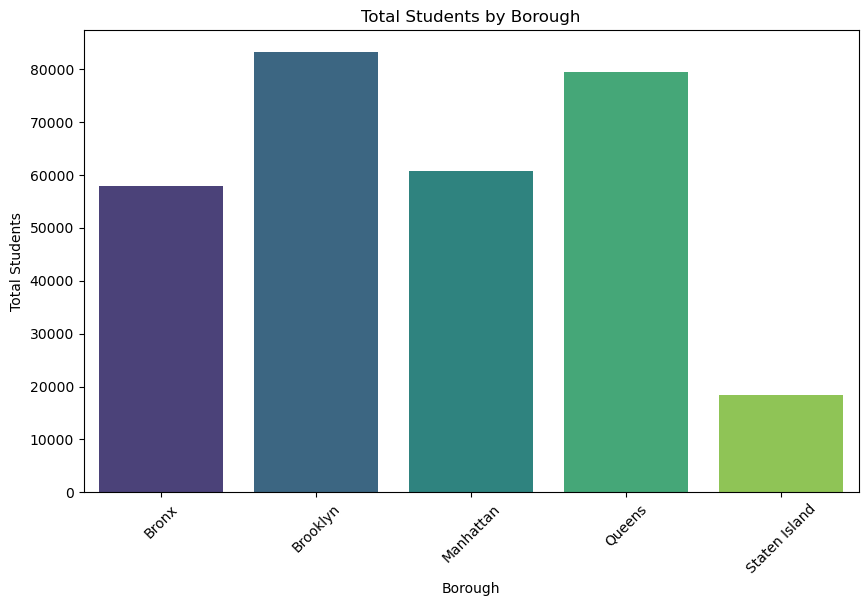

/var/folders/gq/3d_53n2d05n2_n592s2dd_mr0000gn/T/ipykernel_5793/1513522197.py:12: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  average_students_borough = df.groupby('borough', as_index=False)['total_students'].mean()
/var/folders/gq/3d_53n2d05n2_n592s2dd_mr0000gn/T/ipykernel_5793/1513522197.py:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=average_students_borough, x='borough', y='total_students', palette='magma')


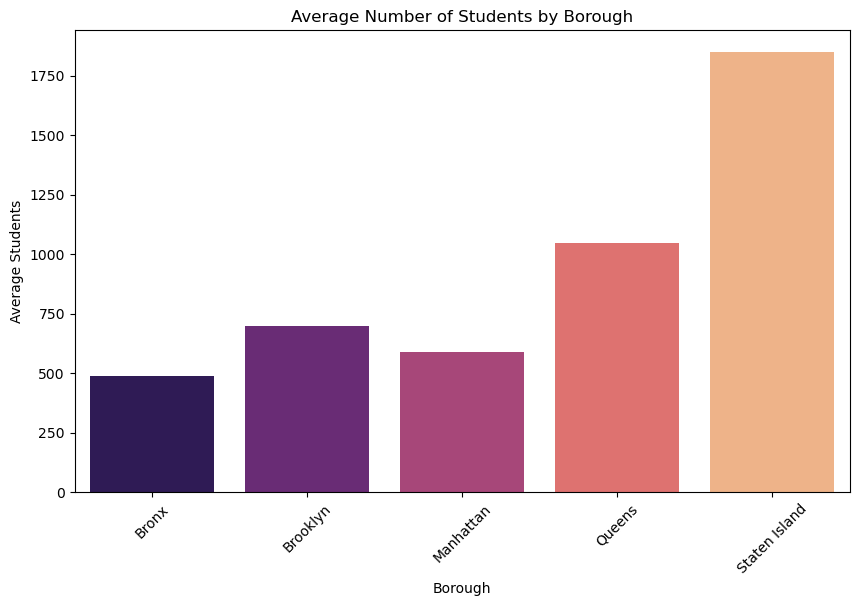

In [ ]:
# visualization of total students by borough by sns barplot
total_students_borough = df.groupby('borough', as_index=False)['total_students'].sum()
plt.figure(figsize=(10,6))
sns.barplot(data=total_students_borough, x='borough', y='total_students', palette='viridis')
plt.title('Total Students by Borough')
plt.xlabel('Borough')   
plt.ylabel('Total Students')
plt.xticks(rotation=45)
plt.show()

# visualization of average students by borough by sns barplot
average_students_borough = df.groupby('borough', as_index=False)['total_students'].mean()
plt.figure(figsize=(10,6))
sns.barplot(data=average_students_borough, x='borough', y='total_students', palette='magma')
plt.title('Average Number of Students by Borough')
plt.xlabel('Borough')   
plt.ylabel('Average Students')
plt.xticks(rotation=45)
plt.show()


### 5.3 grade_span_max grouped by borough

Summary of Maximum Grade Offered by Borough

| Borough        | Mean (Avg Max Grade) | Min | Max |
|----------------|----------------------|-----|-----|
| Bronx          | 11.91                | 9   | 12  |
| Brooklyn       | 11.93                | 9   | 12  |
| Manhattan      | 11.88                | 9   | 12  |
| Queens         | 11.83                | 10  | 12  |
| Staten Island  | 12.00                | 12  | 12  |

Interpretation

Across all boroughs, most schools reach Grade 12, indicating they are high schools or serve through senior grades.

* **Staten Island** schools uniformly reach Grade 12 (no variation).
* **Queens** shows a slightly lower average (11.83), suggesting a few schools may cap at Grade 10 or 11.
* **Bronx, Brooklyn, and Manhattan** have nearly identical averages around 11.9, confirming consistent grade coverage up to high school.

The bar chart visually reinforces this trend — most boroughs cluster near Grade 12, showing minimal variation in the highest grade offered.


In [ ]:
# Summary of grade_span_max by borough
grade_summary = df.groupby('borough')['grade_span_max'].describe()
print(grade_summary)

               count       mean       std   min   25%   50%   75%   max
borough                                                                
Bronx          118.0  11.906780  0.369506   9.0  12.0  12.0  12.0  12.0
Brooklyn       121.0  11.933884  0.381566   9.0  12.0  12.0  12.0  12.0
Manhattan      106.0  11.877358  0.472135   9.0  12.0  12.0  12.0  12.0
Queens          80.0  11.825000  0.497462  10.0  12.0  12.0  12.0  12.0
Staten Island   10.0  12.000000  0.000000  12.0  12.0  12.0  12.0  12.0


/var/folders/gq/3d_53n2d05n2_n592s2dd_mr0000gn/T/ipykernel_5793/1971542277.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grade_summary = df.groupby('borough')['grade_span_max'].describe()


/var/folders/gq/3d_53n2d05n2_n592s2dd_mr0000gn/T/ipykernel_5793/1854466024.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grade_span_max_borough = df.groupby('borough', as_index=False)['grade_span_max'].min()
/var/folders/gq/3d_53n2d05n2_n592s2dd_mr0000gn/T/ipykernel_5793/1854466024.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=grade_span_max_borough, x='borough', y='grade_span_max', palette='coolwarm')


         borough  grade_span_max
0          Bronx               9
1       Brooklyn               9
2      Manhattan               9
3         Queens              10
4  Staten Island              12


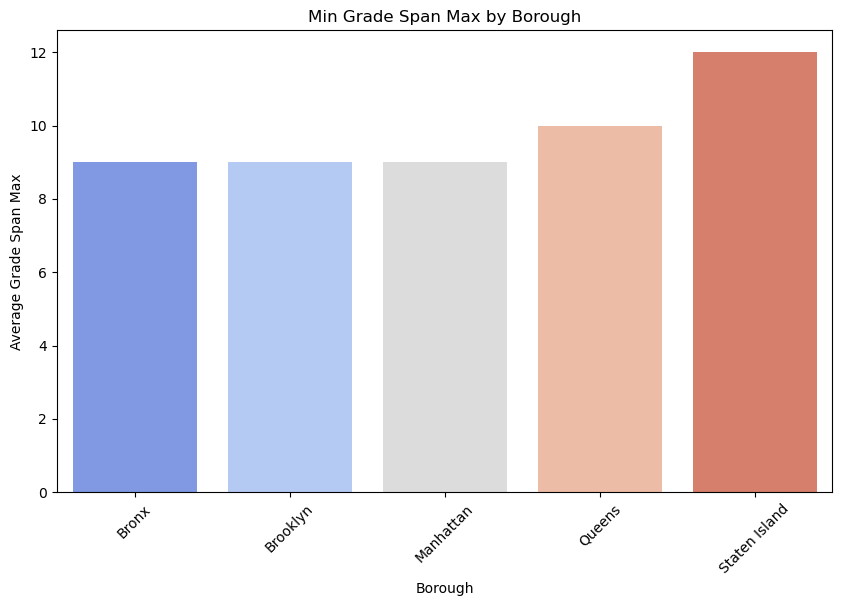

In [ ]:
# grade_span_max grouped by borough
grade_span_max_borough = df.groupby('borough', as_index=False)['grade_span_max'].min()
print(grade_span_max_borough)

# visualization of grade_span_max by borough
plt.figure(figsize=(10,6))
sns.barplot(data=grade_span_max_borough, x='borough', y='grade_span_max', palette='coolwarm')
plt.title('Min Grade Span Max by Borough')
plt.xlabel('Borough')
plt.ylabel('Average Grade Span Max')
plt.xticks(rotation=45)
plt.show()
  

## 6. NYC Schools Data Analysis by Borough

**1. School Distribution**
- **Brooklyn leads** with 121 schools, followed by Bronx (118), Manhattan (106), Queens (80), and Staten Island (10)
- Staten Island has only 2.3% of all schools despite being a full NYC borough, reflecting its lower population density

**2. Student Population Patterns**

Dramatic variation in school sizes:
- **Staten Island**: 1,848 avg students/school (largest - consolidated regional schools)
- **Bronx**: 490 avg students/school (smallest - community-based model)
- **Gap is nearly 4x**, indicating fundamentally different educational approaches

Total enrollment leaders:
- Brooklyn serves most students (83,197) despite moderate school sizes
- Queens has fewer schools (80) but high per-school enrollment (1,047 students)

**3. Grade Coverage**
- **All boroughs consistently reach Grade 12** (means: 11.83-12.0), confirming these are high schools
- Staten Island shows zero variation (all schools = Grade 12)
- Queens has slightly more diversity (some schools cap at Grade 10-11)

---

## Key Insights

- **Resource Equity Question**:

 Bronx has 118 small schools (490 students each) vs. Staten Island's 10 large schools (1,848 each). This suggests vastly different funding models and educational experiences.

- **Access vs. Consolidation Trade-off**: 

More smaller schools (Bronx/Manhattan) may offer personalized education and neighborhood access, while fewer larger schools (Queens/Staten Island) may provide more comprehensive programs but require longer commutes.

- **Brooklyn's Efficiency**:

 Despite not having the largest schools, Brooklyn serves the most students (83K), demonstrating effective capacity utilization across 121 schools.

- **Staten Island Challenge**: 

Only 10 schools serving 18,475 students could create accessibility barriers and limit school choice for families across the borough.